### Dandelion Optimizer

#### Important Links:
- [Paper](https://www.sciencedirect.com/science/article/abs/pii/S0952197622002305)<br>
- [Matlab](https://www.mathworks.com/matlabcentral/fileexchange/114680-dandelion-optimizer)
- [Github](https://github.com/asneerug/DandelionOptimizerTSP/)

#### Imports

In [1]:
import Pkg; 
Pkg.add("SpecialFunctions")
Pkg.add("BenchmarkFunctions")

   Resolving package versions...
  No Changes to `C:\Users\aaath\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\aaath\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\aaath\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\aaath\.julia\environments\v1.10\Manifest.toml`


In [2]:
using Dates
using SpecialFunctions
using Distributions
using Random
using BenchmarkFunctions
using Plots
using DataFrames

#### Initialization

In [3]:
function initialization(Popsize, Dim, UB, LB)
    Boundary_no = length(UB) # number of boundaries
    
    # Preallocate array for Positions
    Positions = zeros(Popsize, Dim)

    # If the boundaries of all variables are equal and user enters a single number for both UB and LB
    if Boundary_no == 1
        Positions = rand(Popsize, Dim) .* (UB - LB) .+ LB
    end

    # If each variable has a different LB and UB
    if Boundary_no > 1
        for i in 1:Dim
            ub_i = UB[i]
            lb_i = LB[i]
            Positions[:, i] = rand(Popsize) .* (ub_i - lb_i) .+ lb_i
        end
    end

    return Positions
end

initialization (generic function with 1 method)

The above function initializes the starting positions of Dandelions.<br><br>

#### Benchmark Functions

In [4]:
function Get_Functions_details(F)
    Fobj = nothing
    LB = nothing
    UB = nothing
    Dim = nothing

    if F == "F1"
        Fobj = F1
        LB = -100
        UB = 100
        Dim = 30
    elseif F == "F2"
        Fobj = F2
        LB = -10
        UB = 10
        Dim = 30
    elseif F == "F3"
        Fobj = F3
        LB = -100
        UB = 100
        Dim = 30
    elseif F == "F4"
        Fobj = F4
        LB = -100
        UB = 100
        Dim = 30
    elseif F == "F5"
        Fobj = F5
        LB = -30
        UB = 30
        Dim = 30
    elseif F == "F6"
        Fobj = F6
        LB = -100
        UB = 100
        Dim = 30
    elseif F == "F7"
        Fobj = F7
        LB = -1.28
        UB = 1.28
        Dim = 30
    elseif F == "F8"
        Fobj = F8
        LB = -500
        UB = 500
        Dim = 30
    elseif F == "F9"
        Fobj = F9
        LB = -5.12
        UB = 5.12
        Dim = 30
    elseif F == "F10"
        Fobj = F10
        LB = -32
        UB = 32
        Dim = 30
    elseif F == "F11"
        Fobj = F11
        LB = -600
        UB = 600
        Dim = 30
    elseif F == "F12"
        Fobj = F12
        LB = -50
        UB = 50
        Dim = 30
    elseif F == "F13"
        Fobj = F13
        LB = -50
        UB = 50
        Dim = 30
    elseif F == "F14"
        Fobj = F14
        LB = -65.536
        UB = 65.536
        Dim = 2
    elseif F == "F15"
        Fobj = F15
        LB = -5
        UB = 5
        Dim = 4
    elseif F == "F16"
        Fobj = F16
        LB = -5
        UB = 5
        Dim = 2
    elseif F == "F17"
        Fobj = F17
        LB = [-5, 0]
        UB = [10, 15]
        Dim = 2
    elseif F == "F18"
        Fobj = F18
        LB = -2
        UB = 2
        Dim = 2
    elseif F == "F19"
        Fobj = F19
        LB = 0
        UB = 1
        Dim = 3
    elseif F == "F20"
        Fobj = F20
        LB = 0
        UB = 1
        Dim = 6
    elseif F == "F21"
        Fobj = F21
        LB = 0
        UB = 10
        Dim = 4
    elseif F == "F22"
        Fobj = F22
        LB = 0
        UB = 10
        Dim = 4
    elseif F == "F23"
        Fobj = F23
        LB = 0
        UB = 10
        Dim = 4
    end

    return LB, UB, Dim, Fobj
end

# Define all benchmark functions below this line

# F1
function F1(x)
    return sum(x.^2)
end

# F2
function F2(x)
    return sum(abs.(x)) + prod(abs.(x))
end

# F3
function F3(x)
    dim = size(x, 2)
    o = 0
    for i in 1:dim
        o += sum(x[1:i])^2
    end
    return o
end

# F4
function F4(x)
    return maximum(abs.(x))
end

# F5
function F5(x)
    sum = 0.0
    for i in 1:length(x)-1
        sum += 100 * (x[i+1] - x[i]^2)^2 + (1 - x[i])^2
    end
    return sum
end

# F6
function F6(x)
    return sum(abs.(x .+ 0.5).^2)
end

# F7
function F7(x)
    dim = size(x, 2)
    return sum(collect(1:dim) .* x.^4) + rand()
end

# F8
function F8(x)
    return sum(-x .* sin.(sqrt.(abs.(x))))
end

# F9
function F9(x)
    dim = size(x, 2)
    return sum(x.^2 - 10 * cos.(2 * π .* x)) + 10 * dim
end

# F10
function F10(x)
    dim = size(x, 2)
    return -20exp(-0.2sqrt(sum(x.^2) / dim)) - exp(sum(cos.(2 * π .* x)) / dim) + 20 + ℯ
end

# F11
function F11(x)
    dim = size(x, 2)
    return sum(x.^2) / 4000 - prod(cos.(x ./ sqrt.(collect(1:dim)))) + 1
end

# F12
function F12(x)
    dim = size(x, 2)
    return (pi / dim) * (10 * ((sin.(pi * (1 + (x[1] + 1) / 4))).^2) + sum((((x[1:dim-1] .+ 1) ./ 4).^2) .* (1 .+ 10 .* ((sin.(pi .* (1 .+ (x[2:dim] .+ 1) ./ 4)))).^2)) + ((x[dim] + 1) / 4)^2) + sum(Ufun(x, 10, 100, 4))
end

# F13
function F13(x)
    dim = size(x, 2)
    return 0.1 * ((sin.(3 * π * x[1]))^2 + sum((x[1:dim-1] .- 1).^2 .* (1 .+ (sin.(3 * π .* x[2:dim])) .^ 2)) + ((x[dim] - 1)^2) * (1 .+ (sin.(2 * π * x[dim])))^2) + sum(Ufun(x, 5, 100, 4))
end

# F14
function F14(x)
    aS = [-32 -16 0 16 32 -32 -16 0 16 32 -32 -16 0 16 32 -32 -16 0 16 32 -32 -16 0 16 32; -32 -32 -32 -32 -32 -16 -16 -16 -16 -16 0 0 0 0 0 16 16 16 16 16 32 32 32 32 32]
    bS = [sum((x' .- aS[:, j]) .^ 6) for j in 1:25]
    return (1 / 500 + sum(1 ./ (collect(1:25) .+ bS)))^(-1)
end

# F15
function F15(x)
    aK = [0.1957, 0.1947, 0.1735, 0.16, 0.0844, 0.0627, 0.0456, 0.0342, 0.0323, 0.0235, 0.0246]
    bK = 1 ./ [0.25, 0.5, 1, 2, 4, 6, 8, 10, 12, 14, 16]
    return sum((aK .- (x[1] .* (bK .^ 2 .+ x[2] .* bK) ./ (bK .^ 2 .+ x[3] .* bK .+ x[4]))).^2)
end

# F16
function F16(x)
    return 4 * x[1]^2 - 2.1 * x[1]^4 + x[1]^6 / 3 + x[1] * x[2] - 4 * x[2]^2 + 4 * x[2]^4
end

# F17
function F17(x)
    return (x[2] - (x[1]^2) * 5.1 / (4 * (π^2)) + 5 / π * x[1] - 6)^2 + 10 * (1 - 1 / (8 * π)) * cos(x[1]) + 10
end

# F18
function F18(x)
    return (1 + (x[1] + x[2] + 1)^2 * (19 - 14 * x[1] + 3 * (x[1]^2) - 14 * x[2] + 6 * x[1] * x[2] + 3 * x[2]^2)) * (30 + (2 * x[1] - 3 * x[2])^2 * (18 - 32 * x[1] + 12 * (x[1]^2) + 48 * x[2] - 36 * x[1] * x[2] + 27 * x[2]^2))
end

# F19
function F19(x)
    aH = [3 10 30; 0.1 10 35; 3 10 30; 0.1 10 35]
    cH = [1, 1.2, 3, 3.2]
    pH = [0.3689 0.117 0.2673; 0.4699 0.4387 0.747; 0.1091 0.8732 0.5547; 0.03815 0.5743 0.8828]
    o = 0
    for i in 1:4
        o -= cH[i] * exp(-(sum(aH[i, :] .* ((x .- pH[i, :]).^2))))
    end
    return o
end

# F20
function F20(x)
    aH = [10 3 17 3.5 1.7 8; 0.05 10 17 0.1 8 14; 3 3.5 1.7 10 17 8; 17 8 0.05 10 0.1 14]
    cH = [1, 1.2, 3, 3.2]
    pH = [0.1312 0.1696 0.5569 0.0124 0.8283 0.5886; 0.2329 0.4135 0.8307 0.3736 0.1004 0.9991; 0.2348 0.1415 0.3522 0.2883 0.3047 0.6650; 0.4047 0.8828 0.8732 0.5743 0.1091 0.0381]
    o = 0
    for i in 1:4
        o -= cH[i] * exp(-sum(aH[i, :] .* ((x .- pH[i, :]).^2)))
    end
    return o
end

# F21
function F21(x)
    aSH = [4 4 4 4; 1 1 1 1; 8 8 8 8; 6 6 6 6; 3 7 3 7; 2 9 2 9; 5 5 3 3; 8 1 8 1; 6 2 6 2; 7 3.6 7 3.6]
    cSH = [0.1, 0.2, 0.2, 0.4, 0.4, 0.6, 0.3, 0.7, 0.5, 0.5]
    o = 0
    for i in 1:5
        o -= sum((x .- aSH[i, :]) * (x .- aSH[i, :])' .+ cSH[i])^(-1)
    end
    return o
end

# F22
function F22(x)
    aSH = [4 4 4 4; 1 1 1 1; 8 8 8 8; 6 6 6 6; 3 7 3 7; 2 9 2 9; 5 5 3 3; 8 1 8 1; 6 2 6 2; 7 3.6 7 3.6]
    cSH = [0.1, 0.2, 0.2, 0.4, 0.4, 0.6, 0.3, 0.7, 0.5, 0.5]
    o = 0
    for i in 1:7
        o -= sum((x .- aSH[i, :]) * (x .- aSH[i, :])' .+ cSH[i])^(-1)
    end
    return o
end

# F23
function F23(x)
    aSH = [4 4 4 4; 1 1 1 1; 8 8 8 8; 6 6 6 6; 3 7 3 7; 2 9 2 9; 5 5 3 3; 8 1 8 1; 6 2 6 2; 7 3.6 7 3.6]
    cSH = [0.1, 0.2, 0.2, 0.4, 0.4, 0.6, 0.3, 0.7, 0.5, 0.5]
    o = 0
    for i in 1:10
        o -= sum((x .- aSH[i, :]) * (x .- aSH[i, :])' .+ cSH[i])^(-1)
    end
    return o
end

function Ufun(x, a, k, m)
    return k .* ((x .- a) .^ m) .* (x .> a) .+ k .* ((-x .- a) .^ m) .* (x .< -a)
end


Ufun (generic function with 1 method)

Implemented CEC 2017 functions in Julia since we couldn't find any implementations for the same online.<br><br>
These have been implemented in the same way as done in the Matlab code.

#### Dandelion Optimizer
__Parameters__:
- Popsize: Determines the number of dandelions initialized
- Dim: States the number of dimensions of the problem
- UB, LB: This is an array giving the upper and lower bounds for the initialization values<br>

__Returns__:
- Initial Positions of all the dandelions

In [5]:
function levy(n, m, beta)
    num = gamma(1+beta)*sin(pi*beta/2)
    den = gamma((1+beta)/2)*beta*2^((beta-1)/2)
    sigma_u = (num/den)^(1/beta)
    u = rand(Normal(0,sigma_u^2), (n, m))
    v = rand(Normal(0,1), (n, m))
    z = u./(abs.(v).^(1/beta))
    return z
end

levy (generic function with 1 method)

In [6]:
function DO(Popsize, Maxiteration, LB, UB, Dim, Fobj)
    start_time = time()
    dandelions = initialization(Popsize, Dim, UB, LB)
    dandelionsFitness = zeros(Popsize)
    Convergence_curve = zeros(Maxiteration)
    for i in 1:Popsize
        dandelionsFitness[i] = Fobj(dandelions[i, :])
    end

    # Calculate the fitness values of initial dandelions.
    sorted_indexes = sortperm(dandelionsFitness)
    Best_position = dandelions[sorted_indexes[1], :]
    Best_fitness = dandelionsFitness[sorted_indexes[1]]
    Convergence_curve[1] = Best_fitness
    t = 2

    while t < Maxiteration + 1

        dandelions_1 = zeros(Popsize, Dim)

        ## Rising stage
        beta = randn(Popsize, Dim)
        alpha = rand() * ((1 / Maxiteration^2) * t^2 - 2 / Maxiteration * t + 1)  # eq.(8) in this paper
        a = 1 / (Maxiteration^2 - 2 * Maxiteration + 1)  # Note: U can use positive or negative on 1 for solving ur problem.
        b = -2a
        c = 1 - a - b
        k = 1 - rand() * (c + a * t^2 + b * t)  # eq.(11) in this paper
        if randn() < 1.5
            for i in 1:Popsize
                lamb = abs.(randn(Dim))  # Generate lamb as a 1D array with length Dim
                theta = (2 * rand() - 1) * pi
                row = 1 / exp(theta)
                vx = row * cos(theta)
                vy = row * sin(theta)
                NEW = rand(Dim) .* (UB .- LB) .+ LB  # Generate NEW as a 1D array with length Dim
                logpdf_vals = logpdf.(LogNormal(0, 1), lamb)
                rhs = alpha * vx * vy * logpdf_vals .* (NEW - dandelions[i, :])  # Remove [i, :] indexing from NEW
                dandelions_1[i, :] .= dandelions[i, :] .+ rhs
            end
        else
            for i in 1:Popsize
                dandelions_1[i, :] .= dandelions[i, :] .* k  # eq.(10) in this paper
            end
        end
        dandelions .= dandelions_1
        # Check boundaries
        dandelions .= max.(dandelions, LB')
        dandelions .= min.(dandelions, UB')

        ## Decline stage
        dandelions_mean = sum(dandelions, dims=1) / Popsize  # eq.(14) in this paper
        dandelions_2 = similar(dandelions)  # Preallocate dandelions_2 array
        for i in 1:Popsize
            for j in 1:Dim
                dandelions_2[i, j] = dandelions[i, j] - beta[i, j] * alpha * (dandelions_mean[1, j] - beta[i, j] * alpha * dandelions[i, j])  # eq.(13) in this paper
            end
        end
        dandelions .= dandelions_2
        # Check boundaries
        dandelions .= max.(dandelions, LB')
        dandelions .= min.(dandelions, UB')

        ## Landing stage
        Step_length = levy(Popsize, Dim, 1.5)
        Elite = repeat(Best_position', inner=(Popsize, 1))
        dandelions_3 = similar(dandelions)

        for i in 1:Popsize
            for j in 1:Dim
                dandelions_3[i, j] = Elite[i, j] + Step_length[i, j] * alpha * (Elite[i, j] - dandelions[i, j]) * (2 * t / Maxiteration)
            end
        end
        dandelions .= dandelions_3  # Update dandelions with the corrected values

        # Check boundaries
        dandelions = max.(dandelions, LB')  # Adjusted to update dandelions_3 directly
        dandelions = min.(dandelions, UB')

        # Calculate fitness values
        for i in 1:Popsize
            dandelionsFitness[i] = Fobj(dandelions[i, :])
        end

        sorted_indexes = sortperm(dandelionsFitness)
        dandelions = dandelions[sorted_indexes[1:Popsize], :]
        SortedfitbestN = dandelionsFitness[sorted_indexes[1:Popsize]]

        # Update optimal seed
        if SortedfitbestN[1] < Best_fitness
            Best_position = dandelions[1, :]
            Best_fitness = SortedfitbestN[1]
        end

        Convergence_curve[t] = Best_fitness
        t = t + 1
    end
    end_time = time()
    total_time = end_time - start_time
    return Best_fitness, Best_position, Convergence_curve, total_time
end


DO (generic function with 1 method)

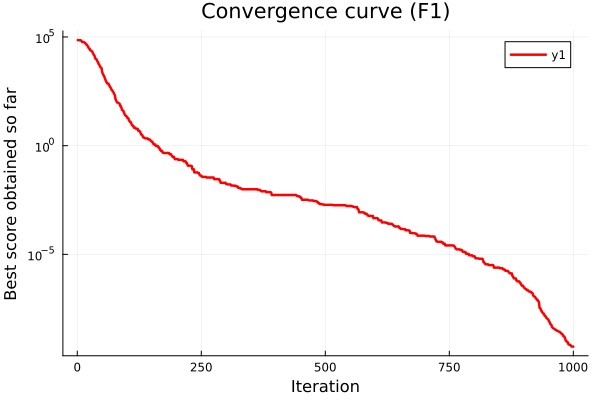

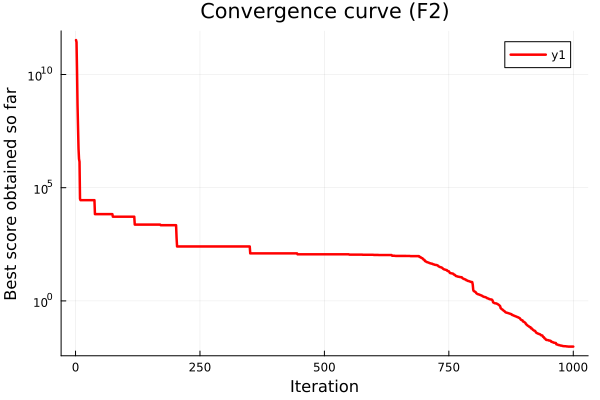

The running time is: 0.17100000381469727
The best fitness is: 5.687789775855774e-10
The best position is: [-5.251963828667725e-6, 7.419681683661326e-7, 5.8510010699510485e-6, 2.7417966495861576e-7, -7.339901664987308e-6, 1.6656734118877017e-6, -1.2145812319032998e-6, -8.997040273341626e-6, 4.797494041733666e-6, 2.504933265204705e-6, -2.6919108410263464e-6, -4.4501026956461804e-7, -7.36066243714184e-6, 3.4619644589343383e-8, 7.058300174057346e-7, 1.354813678680709e-6, -4.273570534972838e-6, 3.223624949024492e-6, 2.0838144675521413e-6, 1.4412611232219544e-7, 7.655139358481124e-6, 2.1146125816514876e-6, -9.904779287997697e-6, 7.080710187165964e-7, -1.8137701252916295e-6, 5.532204763259162e-6, 5.652051519990006e-6, -3.518098401193605e-6, -1.0161114254480878e-6, 2.62377714482935e-7]
The running time is: 0.16199994087219238
The best fitness is: 0.00957954345243825
The best position is: [0.00042050422191670494, 2.0034725581816298e-5, 6.170454970339748e-5, -2.7993675092059254e-7, 0.00016085364

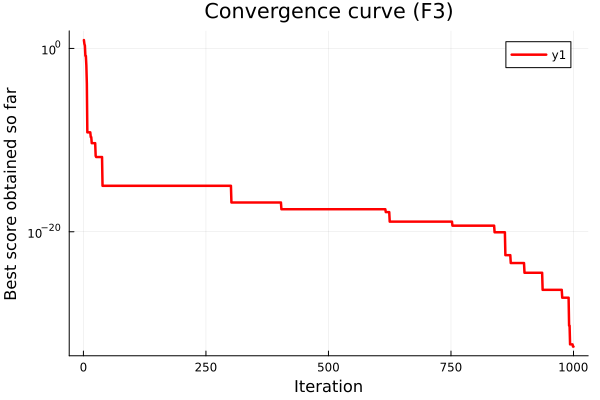

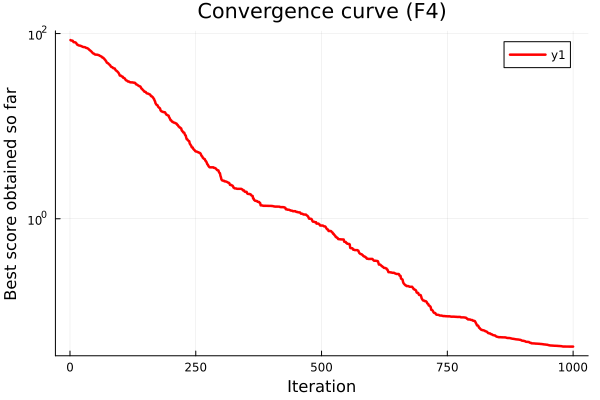

In [11]:
N = 60  # Number of search agents
Max_iter = 1000  # Maximum number of iterations

F_name = ["F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9", "F10", "F11", "F12", "F13", "F14", "F15", "F16", "F17", "F18", "F19", "F20", "F21", "F22", "F23"]

for i in 1:4
    current_F = F_name[i]
    lb_i, ub_i, dim_i, f_i = Get_Functions_details(current_F)
    Best_fitness, Best_position, Convergence_curve, elapsed_time = DO(N, Max_iter, lb_i, ub_i, dim_i, f_i)
    display(plot(1:Max_iter, Convergence_curve, color=:red, linewidth=2.5, yaxis=:log,
        title="Convergence curve ($current_F)", xlabel="Iteration", ylabel="Best score obtained so far"))

    println("The running time is: ", elapsed_time)
    println("The best fitness is: ", Best_fitness)
    println("The best position is: ", Best_position)
end

In [12]:
monte_simulation = 30

results_df = DataFrame(Function = String[], Fitness_Mean = Float64[], Fitness_STD = Float64[])

for i in 1:length(F_name)
    current_F = F_name[i]

    data = zeros(monte_simulation)
    
    for j in 1:monte_simulation
        lb_i, ub_i, dim_i, f_i = Get_Functions_details(current_F)
        Best_fitness, Best_position, Convergence_curve, elapsed_time = DO(N, Max_iter, lb_i, ub_i, dim_i, f_i)

        data[j] = Best_fitness
    end
    avg = mean(data)
    sd = std(data)

	push!(results_df, [current_F, avg, sd])
end

println(results_df)

23×3 DataFrame
 Row │ Function  Fitness_Mean      Fitness_STD   
     │ String    Float64           Float64       
─────┼───────────────────────────────────────────
   1 │ F1             4.34783e-10    2.62875e-10
   2 │ F2            27.2273        48.9757
   3 │ F3             6.57476e-30    1.94614e-29
   4 │ F4             0.0226835      0.0203046
   5 │ F5            68.7098        77.0347
   6 │ F6             1.23771e-9     7.90834e-10
   7 │ F7             0.0145856      0.0051337
   8 │ F8        -10818.8          382.842
   9 │ F9          -248.451         11.3677
  10 │ F10           -1.06865e13     1.10851e7
  11 │ F11            0.00312383     0.00398887
  12 │ F12            3.97609e-26    2.05313e-25
  13 │ F13            0.00058366     0.00215163
  14 │ F14            7.37129        7.60597
  15 │ F15            0.00517648     0.00853007
  16 │ F16           -1.03163        5.13342e-16
  17 │ F17            0.397887       0.0
  18 │ F18            3.0            4.30244